In [1236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import calendar
import time
import math

%matplotlib notebook

df = pd.DataFrame.from_records(pd.read_json('data/minute/aapl.json')['candles'])

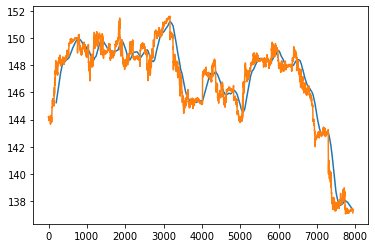

In [644]:
x=[]
n=200
for i in range(len(df)-n):
    x+=[sum(df['low'][i:i+n])/n]
plt.plot([*range(n,len(df['low']))],x)
plt.plot(df['low'][:])

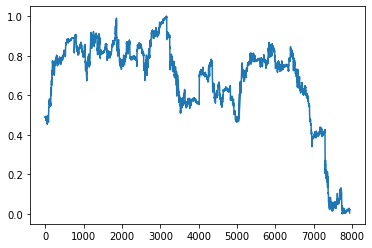

In [645]:
def normalize(v):
    p=[]
    m=max(v)
    n=min(v)
    d=m-n
    for i in range(len(v)):
        p.append((v[i]-n)/d)
    return p

vl=normalize(df['low'])
vh=normalize(df['high'])
plt.plot(vl)

In [646]:
# Gives local min for intervals of n time slots ahead
# O(n)

def findMin(x,v,n):
    i=0
    m=v[i]
    c=0
    index=[]
    value=[]
    for j in range(len(v)-1):
        if v[j+1]>=m:
            c+=1
            if c==n:
                value.append(m)
                index.append(x[i])
                m=v[j+1]
                i=j+1
                c=0
        else:
            c=0
            m=v[j+1]
            i=j+1
            
    for j in range(n-1):
        low=True
        if v[len(v)-1]>v[len(v)-j-2]:
            low=False
    if low==True:
        value.append(v[len(v)-1])
        index.append(x[len(v)-1])
    return index,value

In [647]:
# Gives local max for intervals of n
def findMax(x,v,n):
    i=0
    m=v[i]
    c=0
    index=[]
    value=[]
    for j in range(len(v)-1):
        if v[j+1]<=m:
            c+=1
            if c==n or j+1==len(v)-1:
                value.append(m)
                index.append(x[i])
                m=v[j+1]
                i=j+1
                c=0
        else:
            c=0
            m=v[j+1]
            i=j+1
            
    for j in range(n-1):
        high=True
        if v[len(v)-1]<v[len(v)-j-2]:
            high=False
    if high==True:
        value.append(v[len(v)-1])
        index.append(x[len(v)-1])
    return index,value

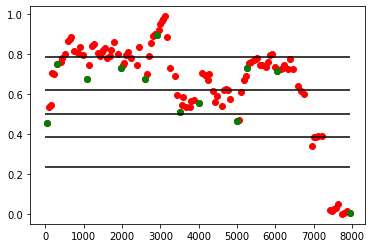

In [659]:
x,y=findMin(range(len(vl)),vl,int(len(vl)/200))
x2,y2=findMin(x,y,5)

plt.scatter(x,y,c='r')
plt.scatter(x2,y2,c='g')

plt.plot()
plt.hlines(.236, 0, len(vh), 'black', '-')
plt.hlines(.382, 0, len(vh), 'black', '-')
plt.hlines(.50, 0, len(vh), 'black', '-')
plt.hlines(.618, 0, len(vh), 'black', '-')
plt.hlines(.786, 0, len(vh), 'black', '-')

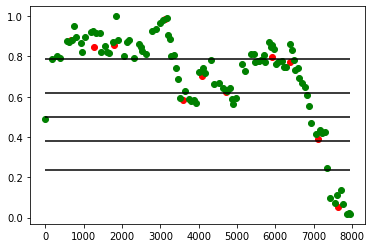

In [660]:
xh,yh=findMax(range(len(vh)),vh,int(len(vh)/200))
x,y=findMax(x,y,5)

plt.scatter(x,y,c='r')
plt.scatter(xh,yh,c='g')
plt.hlines(.236, 0, len(vh), 'black', '-')
plt.hlines(.382, 0, len(vh), 'black', '-')
plt.hlines(.50, 0, len(vh), 'black', '-')
plt.hlines(.618, 0, len(vh), 'black', '-')
plt.hlines(.786, 0, len(vh), 'black', '-')

In [661]:
xl,yl=findMin(range(len(vl)),vl,int(len(vh)/200))
xh,yh=findMax(range(len(vh)),vh,int(len(vh)/200))
print(len(xl))
print(len(xl))

116
116


In [662]:
#O(n+m)

def zipp(lv,hv,liv,hiv,p):
    c=0
    v=[]
    vi=[]
    li=0
    hi=0
    m=0
    counter = 0
    while li<len(lv) and hi<len(hv):
        m=li
        while liv[li]<hiv[hi]:
            if lv[m]-lv[li]>-p:
                m=li
            li+=1
        v.append(lv[m])
        vi.append(liv[m])

        m=hi
        while hiv[hi]<liv[li]:
            if hv[m]-hv[hi] < p:
                m=hi
            hi+=1
            if hi>=len(hv):
                break
        if hi>=len(hv):
            break
        v.append(hv[m])
        vi.append(hiv[m])
    return vi,v

In [663]:
#O(n)

def unzipp(x,y):
    lv=[]
    hv=[]
    liv=[]
    hiv=[]
    for i in range(len(x)):
        if i%2==0:
            liv.append(x[i])
            lv.append(y[i])
        else:
            hiv.append(x[i])
            hv.append(y[i])  
    return lv,hv,liv,hiv

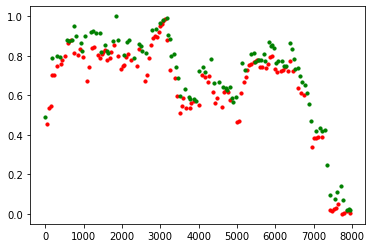

In [664]:
plt.scatter(xl,yl,s=10,c='r')
plt.scatter(xh,yh,s=10,c='g')

In [666]:
X,Y=zipp(yl,yh,xl,xh,0.03)
ylow,yhigh,xlow,xhigh=unzipp(X,Y)

KeyboardInterrupt: 

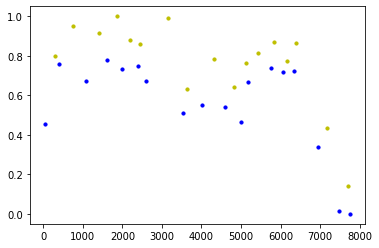

In [667]:
plt.scatter(xlow,ylow,s=10,c='b')
plt.scatter(xhigh,yhigh,s=10,c='y')

In [668]:
def findInc(vec,x,y,change,daysbefore):
    v=[]
    vi=[]
    startendx=[]
    startendy=[]

    veci=[*range(len(vec))]
    for i in range(1,len(x)-1):
        if y[i+1]-y[i]>=change:
            n=x[i]+1
            m=n-daysbefore
            if m<0:
                m=0
            v.append(vec[m:n])
            vi.append(veci[m:n])
            startendx.append([x[i],x[i+1]])
            startendy.append([y[i],y[i+1]])
    return v,vi,startendx,startendy

def findDec(vec,x,y,change,daysbefore):
    v=[]
    vi=[]
    startendx=[]
    startendy=[]
    
    veci=[*range(len(vec))]
    for i in range(1,len(x)-1):
        if y[i+1]-y[i]<=change:
            n=x[i]+1
            m=n-daysbefore
            if m<0:
                m=0
            v.append(vec[m:n])
            vi.append(veci[m:n])
            startendx.append([x[i],x[i+1]])
            startendy.append([y[i],y[i+1]])
    return v,vi,startendx,startendy



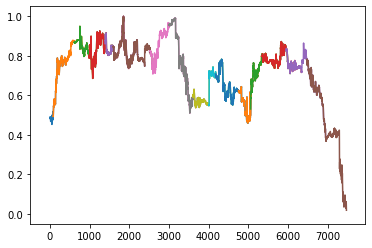

In [669]:
incy,incx,incsex,incsey=findInc(vh,X,Y,0.01,1000)
for i in range(len(incy)):
    plt.plot(incx[i],incy[i])
    plt.xlim([-500, len(vl)])
    plt.ylim([-0.05, 1.05])

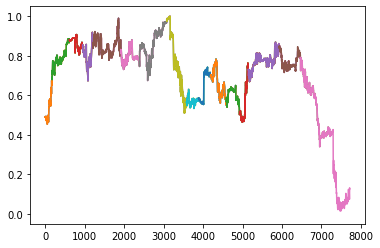

In [741]:
pattern_scale_factor = 1
decy,decx,decsex,decsey=findDec(vl,X,Y,0.05,1250)

for i in range(int(len(decy)/pattern_scale_factor)):
    plt.plot(decx[pattern_scale_factor*i], decy[pattern_scale_factor*i])
    plt.ylim([-0.05, 1.05])

In [788]:
def Differences(v):
    d=[]
    for i in range(len(v)-1):
        d.append(v[i+1]-v[i])
    return d

diff=Differences(vl)
# plt.plot(diff)

In [631]:
import umap.umap_ as umap
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [1097]:
patterns = pd.DataFrame(decy)
patterns = patterns.drop([0,1])

In [1201]:
reducer = umap.UMAP(a=None, angular_rp_forest=False, b=None,
          force_approximation_algorithm=False, init='spectral', learning_rate=0.5,
          local_connectivity=1.0, low_memory=False, metric='euclidean',
          metric_kwds=None, min_dist=0.05, n_components=2, n_epochs=1000,
          n_neighbors=2, negative_sample_rate=5, output_metric='euclidean',
          output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
          set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
          target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
          transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

reducer2 = umap.UMAP(a=None, angular_rp_forest=False, b=None,
          force_approximation_algorithm=False, init='spectral', learning_rate=0.5,
          local_connectivity=1.0, low_memory=False, metric='euclidean',
          metric_kwds=None, min_dist=0.05, n_components=2, n_epochs=25000,
          n_neighbors=2, negative_sample_rate=5, output_metric='euclidean',
          output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
          set_op_mix_ratio=1.0, spread=2.0, target_metric='categorical',
          target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
          transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

reducer3 = umap.UMAP(a=None, angular_rp_forest=False, b=None,
          force_approximation_algorithm=False, init='spectral', learning_rate=0.25,
          local_connectivity=1.0, low_memory=False, metric='euclidean',
          metric_kwds=None, min_dist=0.05, n_components=2, n_epochs=25000,
          n_neighbors=2, negative_sample_rate=5, output_metric='euclidean',
          output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
          set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
          target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
          transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

In [1203]:
reducer.fit(patterns)
embedding = reducer.transform(patterns)
assert(np.all(embedding == reducer.embedding_))

reducer2.fit(patterns)
embedding2 = reducer2.transform(patterns)
assert(np.all(embedding2 == reducer2.embedding_))

reducer3.fit(patterns)
embedding3 = reducer3.transform(patterns)
assert(np.all(embedding3 == reducer3.embedding_))

<IPython.core.display.Javascript object>


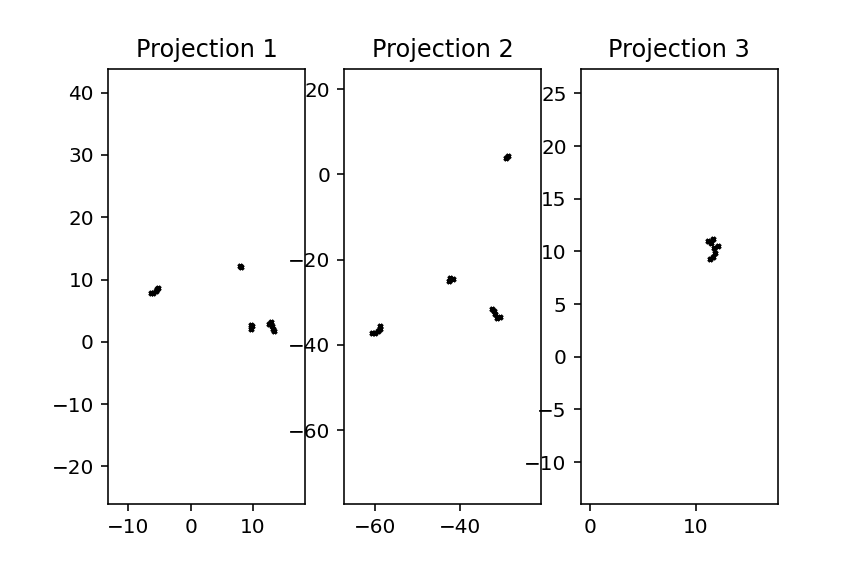

Text(0.5, 1.0, 'Projection 3')

In [1237]:
plt.subplot(1, 3, 1)
plt.scatter(embedding[:, 0], embedding[:, 1], c='black', cmap='Spectral', s=5, marker='x')
plt.gca().set_aspect('equal', 'datalim')
plt.title('Projection 1', fontsize=12)

plt.subplot(1, 3, 2)
plt.scatter(embedding2[:, 0], embedding2[:, 1], c='black', cmap='Spectral', s=5, marker='x')
plt.gca().set_aspect('equal', 'datalim')
plt.title('Projection 2', fontsize=12)

plt.subplot(1, 3, 3)
plt.scatter(embedding3[:, 0], embedding3[:, 1], c='black', cmap='Spectral', s=5, marker='x')
plt.gca().set_aspect('equal', 'datalim')
plt.title('Projection 3', fontsize=12)

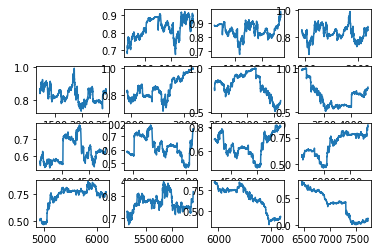

In [1217]:
for i in range(2, int(len(decy)/pattern_scale_factor)):
    plt.subplot(4, 4, i)
    plt.plot(decx[pattern_scale_factor*i], decy[pattern_scale_factor*i])